# Regularizáció

Ebben a részben a regularizáció hatását fogjuk tanulmányozni. A regularizáció két gyakran használt módja: L1 (Lasso) és L2 (Ridge). A regularizáció célja a túltanulás elkerülése. A megfelelő architektúra kiválasztása nehéz. Nagyobb háló általában nagyobb kifejező erőt jelent. Viszont a nagy hló könnyebben tanulhat túl.

Egy hálózat neuronokból áll, minnél több neuron kapcsol be, annál bonyolultabb a függvény. A túltanulás megakadályozása érdekében kényszeríteni kell a hálót, hogy csak azok a neuronok működjenek, amikre a leginkább szükség van. Azaz azt szeretnénk, hogy egy neuron bekapcsolásának ára legyen.

Különböző lehetőségek vannak arra, hogy a hálót lehessen regularizálni: L1, L2 illetve dropout. Ezek a leggyakrabban használtak. Viszont a hálóknak vannak más elemei is, amik eredményezhetnek regularizációs hatást, pl. batchnormalization vagy maga a relu. Az adatban levő hibák, zajok is eredményeznek ilyen hatást.

Mind az L1 és L2 regularizációk a súlyok függvényei. A pontos formulák:

\begin{equation}
L^{(reg)}_w(y_{predicted}, y_{target}) = L_w(y_{predicted}, y_{target}) + \beta \cdot \sum_{i,j}{|w_{ij}|},
\end{equation}

\begin{equation}
L^{(reg)}_w(y_{predicted}, y_{target}) = L_w(y_{predicted}, y_{target}) + \beta \cdot \frac{1}{2}\sum_{i,j}{w^2_{ij}}.
\end{equation}

A $\beta$ szabályozza regularizációs tag szerepét. Az első formula az L1, míg a második az L2. $L_w$ a loss például Huber. Ha a $w_{ij}$  0-hoz közel kerül, akkor a regularizációs tag csökken. Tehát egy ilyen loss esetén, akkor lehet a minimumot hatékonyabban elérni, ha csak a legfontosabb súlyok maradnak bekapcsolva, amivel a pontosség kellően jó, azaz $L_w$ alacsony. Ez összességében azt eredményezi, hogy a hálónak mintha csökkenne a komplexitása.

Az alábbi két példában szemléltetjük mi fog történni regularizáció hatására.

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
from multilayer_nn import mnist_architecture as ma
from multilayer_nn import regularizers

c:\users\adambudai\anaconda3\envs\ml\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# betötjuk az MNIST adatokat és visszekérjük a tanító adatokat
x, y = ma.load_data()

2051 60000 28 28
Reading images: [100%]
2049 60000
Reading labels: [100%]
2051 10000 28 28
Reading images: [100%]
2049 10000
Reading labels: [100%]


### Regularizáció nélkül

In [4]:
regularizer = regularizers.ZeroRegularizer()
archit_noreg = ma.Architecture(regularizer, x, y)  # this architecture is the same we used in the mlp tutorial

Iterating: [99%]


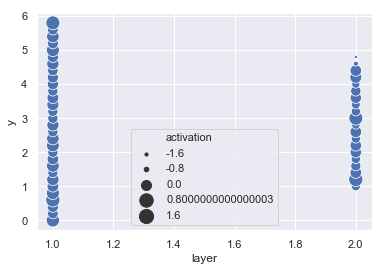

In [5]:
archit_noreg.show_activations()

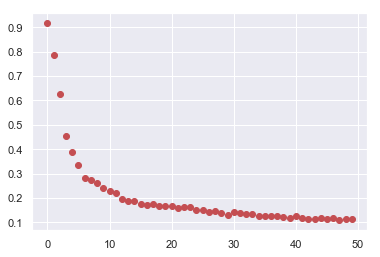

In [9]:
archit_noreg.show_learning_curve()

### Regularizációval

In [13]:
regularizer = regularizers.L2(1.0)  # 0.1: the learning curve is smooth but the activations are not so devided 
archit_reg = ma.Architecture(regularizer, x, y)

Iterating: [99%]


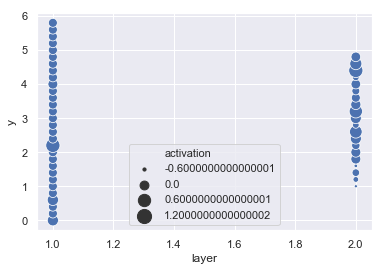

In [14]:
archit_reg.show_activations()

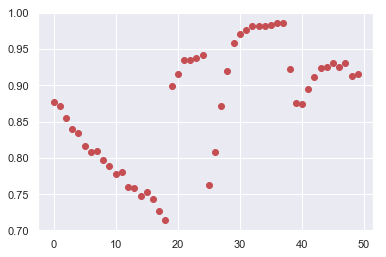

In [15]:
archit_reg.show_learning_curve()

Látható, hogy az aktivációk fókuszáltabbak. Kisebbek a foltok. A learning curve zajos, oszcillál, ami a túl nagy regularizáció következménye.